# Comparing the performance of different algorithms on different datasets and preparations for Relational Learning

<h3> <font color="blue"> Introduction </h3>

Compare the performance of different learning algorithms on different datasets.
    
 'pyswip', a Python SWI-Prolog interface, in preparation for the Relational Learning lab next week. Having SWI-Prolog and pyswip installed, we also try a simple relational learning problem (i.e. Michalski's trains problem) using the ILP system Aleph. 
    


<h3> <font color="blue"> Methodologies</font> </h3>
<p> 1. Comparing the performance of different learning algorithms on different datasets and using relevant `sklearn` libraries </p>
<p> 2. Installation of 'pyswip', a Python SWI-Prolog interface, in preparation for the Relational Learning lab next week. </p>
<p> 3. Testing the installation of SWI-Prolog and pyswip using Aleph on the train problem. </p>

## <font color="blue"> Combining the exercises from previous weeks to compare the performance of different learning algorithms on different datasets
 

<h3><font color="red">Exercise 1 </font> </h3>
<p> Extend the 10-fold cross-validation exercises from previous weeks to compare the performance of Decision tree, Perceptron, MLP, NB and SVM on four datasets (i.e. Iris, Breast Cancer, Spam and Digits)</p>
</p>

In [1]:
# Answer to Exercise 1
# Breast cancer dataset with 5 different approach

# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import pandas as pd

breast_cancer = pd.read_csv('breast_cancer_data.csv')

# Features "id" and "Unnamed: 32" should be removed
feature_names = breast_cancer.columns[2:-1]
X = breast_cancer[feature_names]
# the target feature, i.e. diagnosis class
y = breast_cancer.diagnosis

from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
# M -> 1 and B -> 0
y = class_le.fit_transform(breast_cancer.diagnosis.values)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=0)

# Spot Check Algorithms
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Perceptron', Perceptron(eta0=0.1, random_state=0, max_iter=100)))
models.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Within the same dataset, just based on the accuracy, Naive Bayes,93.9%, permformace was the best among the other algorithms.
# As the second algo Decision Tree,92%, followed by SVM,90.1%,MLP,89.9% and Perceptron,81.4%.

# Among the algorithms evaluated on the Iris dataset, Naive Bayes achieved the highest accuracy of 93.9%, with a relatively 
# low standard deviation of 3.3%. This indicates that Naive Bayes performed the best in terms of accuracy among the algorithms.
# The Decision Tree algorithm obtained an accuracy of 92.0%, with a standard deviation of 2.9%. While slightly lower than 
# Naive Bayes, it still demonstrates a strong performance as the second-best algorithm in terms of accuracy. 
# The SVM algorithm obtained an accuracy of 90.1%, with a standard deviation of 3.3%. Although slightly lower 
# than the Decision Tree, SVM still demonstrated a good  performance among the others.
# The MLP achieved an accuracy of 89.9%, with a standard deviation of 3.2%. While it performed better than 
# the Perceptron, it fell behind Naive Bayes and the Decision Tree in terms of accuracy.
# The Perceptron algorithm had an accuracy of 81.5%, with a relatively high standard deviation of 12.1%. 
# This indicates that the Perceptron algorithm performed the worst among the evaluated algorithms in terms of accuracy.

# In summary, Naive Bayes had the highest accuracy, followed closely by the Decision Tree and SVM algorithms.
# MLP performed well, while the Perceptron had the lowest accuracy. These results suggest that Naive Bayes 
# performed the best in terms of accuracy on the Iris dataset, while the Perceptron algorithm struggled to 
# achieve accurate predictions.

Naive Bayes: 0.939037 (0.033207)
Decision Tree: 0.924862 (0.029212)
Perceptron: 0.814618 (0.120635)


C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

MLP: 0.899169 (0.031162)
SVM: 0.901495 (0.032657)


C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
# The Iris  dataset with 5 different approach
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the models
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Perceptron', Perceptron(eta0=0.1, random_state=0, max_iter=100)),
    ('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC(gamma=0.001))
]

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Among the algorithms evaluated on the Iris dataset, MLP achieved the highest accuracy of 98.8%, with a  
# low standard deviation of 1.0%. This indicates that MLP performed the best in terms of accuracy among the algorithms.
# Perceptron and SVM algorithms obtained an accuracy of almost identical performances with 98.1% and 98.4%, 
# with a standard deviation of 1.3% and 1.5%. While slightly lower than MLP, it still demonstrates a strong 
# performance as the second-best and third-best algorithm in terms of accuracy. 
# The Decision Tree achieved an accuracy of 94.3%, with a standard deviation of 2.1%. While it performed better than 
# the Naive Bayes, it fell behind Naive Bayes and the Decision Tree in terms of accuracy.
# The Naive Bayes algorithm had an accuracy of 92.9%, with a relatively high standard deviation of 3.1%. 
# This indicates that the Perceptron algorithm performed the worst among the evaluated algorithms in terms of accuracy.

# In summary, MLP had the highest accuracy, followed closely by the Perceptron and SVM algorithms.
# MLP performed well, while the Perceptron had the lowest accuracy. These results suggest that MLP 
# performed the best in terms of accuracy on the Iris dataset, while the Perceptron algorithm struggled to 
# achieve accurate predictions. Also another point to be cared of is the possible overfit of the MLP, Perceptron and 
# SVM algorithms.

Decision Tree: 0.943056 (0.021018)
Perceptron: 0.981944 (0.013958)


C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

MLP: 0.988889 (0.010393)
Naive Bayes: 0.929167 (0.032543)
SVM: 0.984722 (0.015775)


In [21]:
# The Digits dataset with 5 different approach
from sklearn import datasets

digits = datasets.load_digits()

# To apply a classifier on this data, we need to flatten the image, to
# turn the data into a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create classifiers
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Perceptron', Perceptron(eta0=0.1, random_state=0, max_iter=100)),
    ('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC(gamma=0.001))
]

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Among the algorithms evaluated on the Digit dataset, MLP achieved the highest accuracy of 96.3%, with a low standard deviation
# of 1.0%. This indicates that MLP performed the best in terms of accuracy among the algorithms.
# The SVM algorithm obtained an accuracy of 98.4%, with a standard deviation of 1.0%. While slightly lower than 
# MLP, it still demonstrates a strong performance as the second-best algorithm in terms of accuracy. 
# The Decision Tree algorithm obtained an accuracy of 93.7%, with a standard deviation of 36.8%. Although slightly lower 
# than the MLP, Decision Tree still demonstrated a good  performance among the others.
# The Perceptron achieved an accuracy of 98.1%, with a standard deviation of 1.3%. While it performed better than 
# the Naive Bayes, it fell slightly behind SVM and the MLP in terms of accuracy.
# The Naive Bayes algorithm had an accuracy of 92.91%, with a relatively high standard deviation of 3.2%. 
# This indicates that the Perceptron algorithm performed the worst among the evaluated algorithms in terms of accuracy.

# In summary, MLP had the highest accuracy, followed closely by the Decision Tree and SVM algorithms.
# MLP, Decision Tree and SVM performed, while the Perceptron had the lowest accuracy. These results suggest that  MLP, Decision Tree 
# and SVM performed the best in terms of accuracy on the Digit dataset, while the Naive Bayes algorithm struggled to 
# achieve accurate predictions.Also another point to be cared of is the possible overfit of the MLP, Decision Tree and 
# SVM algorithms.

Naive Bayes: 0.929167 (0.032543)
SVM: 0.984722 (0.015775)


C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

MLP: 0.988889 (0.010393)
Perceptron: 0.981944 (0.013958)
DecisionTree: 0.937500 (0.017841)


In [20]:
# The Spam dataset with 5 different approach

import numpy as np
import math
import os
import numpy as np
import collections
import pickle
from pandas import read_csv

DICT_SIZE = 500

def get_dictionary(mail_dir):
	emails = [os.path.join(mail_dir,f) for f in os.listdir(mail_dir)]    
	all_words = []	
	for email in emails:
		#if the file is a directory, recursively add the words in that directory
		if(os.path.isdir(email)):
			all_words += get_dictionary(email)
		#otherwise, add the words from the email file.
		else:
			with open(email) as m:
				for line in m:
					words = line.split()
					all_words += words
	return all_words

def make_dictionary(all_words):
	dictionary = collections.Counter(all_words)
	#print(dictionary)
	list_to_remove = dictionary.keys()
	print(list_to_remove)
	for item in list(dictionary.keys()):
		if item.isalpha() == False:
			del dictionary[item]
		elif len(item) == 1:
			del dictionary[item]
	dictionary = dictionary.most_common(DICT_SIZE)
	return dictionary

def get_features(mail_dir,dictionary):
	files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]		
	feature_matrix = np.zeros((len(files),DICT_SIZE))
	docID = 0
	for fil in files:
		with open(fil) as m:
			for i,line in enumerate(m):
				if(i==0):
					words  = line.split()
					for word in words:
						for i,d in enumerate(dictionary):
							#if email word is in the dictionary, count the number of occurances of it.
							if(d[0] == word):
								feature_matrix[docID, i] = words.count(word)
		docID = docID + 1
	return feature_matrix	

all_words = get_dictionary('Ling_spam_data')
dictionary = make_dictionary(all_words)

spam = get_features('./Ling_spam_data/spam',dictionary)
ham = get_features('./Ling_spam_data/ham',dictionary)

filename = 'spam.save'
pickle.dump(spam, open(filename, 'wb'))
filename = 'ham.save'
pickle.dump(ham, open(filename, 'wb'))

spam =  pickle.load(open('spam.save', 'rb'),encoding='latin1')
ham =  pickle.load(open('ham.save', 'rb'),encoding='latin1')
data_set=np.concatenate((spam, ham))
data_labels = np.zeros(len(ham) + len(spam))
data_labels[0:len(spam)] = 1


X_train, X_validation, Y_train, Y_validation = train_test_split(data_set, data_labels, test_size=0.25, random_state=0)

models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC(gamma=0.001)))
models.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)))
models.append(('Perceptron', Perceptron(eta0=0.1, random_state=0, max_iter=100)))
models.append(('DecisionTree', DecisionTreeClassifier()))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Among the algorithms evaluated on the Spam dataset, MLP achieved the highest accuracy of 98.8%, with a low standard deviation
# of 1.0%. This indicates that MLP performed the best in terms of accuracy among the algorithms.
# The SVM algorithm obtained an accuracy of 98.4%, with a standard deviation of 1.5%. While slightly lower than 
# MLP, it still demonstrates a strong performance as the second-best algorithm in terms of accuracy. 
# The Perceptron algorithm obtained an accuracy of 98.1%, with a standard deviation of 1.3%. Although slightly lower 
# than the MLP, Perceptron still demonstrated a good  performance among the others.
# The Decision Tree achieved an accuracy of 94.0%, with a standard deviation of 2.4%. While it performed better than 
# the Naive Bayes, it fell slightly behind SVM and the MLP in terms of accuracy.
# The Naive Bayes algorithm had an accuracy of 92.91%, with a relatively high standard deviation of 3.2%. 
# This indicates that the Perceptron algorithm performed the worst among the evaluated algorithms in terms of accuracy.

# In summary, MLP had the highest accuracy, followed closely by the Perceptron and SVM algorithms.
# MLP, Perceptron and SVM performed, while the Naive Bayes had the lowest accuracy. These results suggest that  MLP, Perceptron 
# and SVM performed the best in terms of accuracy on the Spam dataset, while the Naive Bayes algorithm struggled to 
# achieve accurate predictions. Also another point to be cared of is the possible overfit of the MLP, Perceptron and 
# SVM algorithms.

dict_keys(['lectureship', 'linguistic', 's', 'c', 'h', 'o', 'l', 'f', 'e', 'n', 'g', 'd', 'u', 't', 'v', 'r', 'y', 'm', 'lecturer', 'generative', 'linguistics', 'successful', 'candidate', 'must', 'complete', 'process', 'doctorate', 'able', 'demonstrate', 'strong', 'research', 'focus', 'historical', 'phonology', 'syntax', 'romance', 'vium', 'dissertation', 'publish', 'work', 'area', 'ability', 'teach', 'sociolinguistic', 'advantage', 'post', 'tenable', 'october', 'salary', 'within', 'range', 'pound', 'per', 'annum', 'grade', 'scale', 'accord', 'experience', 'further', 'detail', 'obtain', 'personnel', 'officer', 'old', 'shire', 'hall', 'university', 'durham', 'dh', 'hp', 'unite', 'kingdom', 'tel', 'fax', 'whom', 'application', 'send', 'later', 'please', 'quote', 'reference', 'a', 'negative', 'concord', 'interest', 'grammar', 'various', 'dialect', 'american', 'british', 'english', 'anyone', 'speak', 'natively', 'answer', 'grammaticality', 'question', 'email', 'note', 'effect', 'll', 'back

C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uysal\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

MLP: 0.988889 (0.010393)
Perceptron: 0.981944 (0.013958)
DecisionTree: 0.940278 (0.024096)


As the comparison of the 4 datasets which are Breast cancer, Iris, Spam, and Digit, and 5 classifiers which are Decision Tree, Perceptron, MLP, Naive Bayes and SVM. 

In the spam dataset, the MLP achieved the highest accuracy of 98.89% with a standard deviation of 0.01, closely followed by the SVM with an accuracy of 98.47% and a standard deviation of 0.01. The Perceptron performed well with an accuracy of 98.19% and a standard deviation of 0.01. The Decision Tree achieved an accuracy of 94.03% with a standard deviation of 0.02, while the Naive Bayes achieved an accuracy of 92.92% with a standard deviation of 0.03.

In the digit dataset, the MLP and SVM  performed exceptionally well, both achieving an accuracy of 98.89% with a standard deviation of 0.01 and 0.01, respectively. The Perceptron achieved an accuracy of 98.19% with a standard deviation of 0.01. The Decision Tree achieved an accuracy of 93.75% with a standard deviation of 0.01, while the Naive Bayes achieved an accuracy of 92.92% with a standard deviation of 0.03.

In the iris dataset, the MLP and SVM classifier achieved the highest accuracy of 98.89% with a standard deviation of 0.010 and 0.015, respectively. The Decision Tree performed well with an accuracy of 94.31% and a standard deviation of 0.02. The Naive Bayes classifier achieved an accuracy of 92.92% with a standard deviation of 0.03. The Perceptron achieved an accuracy of 98.19% with a standard deviation of 0.01.

In the breast cancer dataset, the MLP and SVM classifiers achieved accuracy scores of 89.92% and 90.15%, respectively. The Naive Bayes achieved an accuracy of 93.90% with a standard deviation of 0.03. The Decision Tree achieved an accuracy of 92.49% with a standard deviation of 0.02. The Perceptron classifier had the lowest accuracy of 81.46% with a relatively high standard deviation of 0.12.

Overall, the MLP and SVM performed well across different datasets, performing high accuracies with relatively low standard deviations. The Decision Tree also showed good performance, while the Naive Bayes and Perceptron had slightly lower accuracies but still giving arguably good results depending on the dataset.

## <font color="blue"> Preparations for Relational Learning
    
In this lab session we install SWI-Prolog and 'pyswip', a Python SWI-Prolog interface, in preparation for the Relational Learning lab next week. We also test these installations using the ILP system Aleph on the train problem.

### <font color="blue"> SWI-Prolog

If you are using the Linux machines in the labs, SWI-Prolog is already installed on the Linux lab machines. This is a free software and you can also istall this on your own computer. Please visit SWI-Prolog website for more information:
https://www.swi-prolog.org/download/stable
    
If you have not used Prolog before, you may start from the beginner's tutorial: 
https://www.swi-prolog.org/pldoc/man?section=quickstart
    
    
You may also find the SWISH graphical interface and the examples useful:
https://swish.swi-prolog.org/example/examples.swinb
    
    
### <font color="blue"> PySwip
    
PySwip is a Python interface to SWI-Prolog enabling us to run Prolog programs within Python. We need to install 'pyswip' library to be able to use the Realtional Learning and ILP systems which are implemented in Prolog (e.g Aleph) within a Jupyter notebook. 

More information about PySwip can be found from the following website:
https://pypi.org/project/pyswip/
    
You can install PySwip using one of the following commands:    

In [23]:
#pip install pyswip 
# Or 
!pip3 install pyswip 

  Obtaining dependency information for pyswip from https://files.pythonhosted.org/packages/dd/b8/9b79319127d48e41542500dea4181ee19758c2710432a397366ac85b7117/pyswip-0.2.10-py2.py3-none-any.whl.metadata


### <font color="blue"> Aleph
    
Aleph is an Inductive Logic Programming (ILP) system developed by Ashwin Srinivasan: http://www.cs.ox.ac.uk/activities/machlearn/Aleph/

In this lab we use a porting of Aleph v.5 to SWI-Prolog prepared by Fabrizio Riguzzi:
https://github.com/friguzzi/aleph

### <font color="blue"> PyILP

PyILP is  novel user-friendly Python/Jupyter interface for Inductive Logic programming(ILP) system for teaching relational machine learning and comparing different algorithms developed by Dany Varghese. 
You can refer https://github.com/danyvarghese/PyILP for further information about PyILP. 
    
You can install PyILP using the following command:

In [24]:
pip install PyILP

  Obtaining dependency information for PyILP from https://files.pythonhosted.org/packages/d8/46/91e3f2635eebee4d00122d260a5577b3521cd41310459f3a9e0170d2b039/PyILP-0.0.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


### <font color="blue"> Michalski’s trains problem

Michalski’s trains problem is a classic machine learning problem where the learning task is to discover a general pattern or rule that can be used to classify five eastbound trains vs five westbound trains as shown in the figure below. 
        
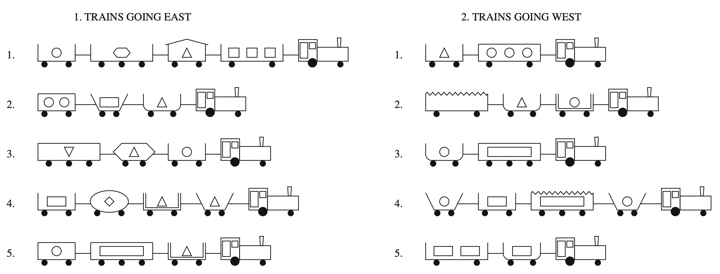


This problem can be represented as a Relational Learning problem as shown below:
    
```
:-begin_in_pos. % Positive examples
eastbound(east1).
eastbound(east2).
eastbound(east3).
eastbound(east4).
eastbound(east5).
:-end_in_pos.
    
:-begin_in_neg. % Negative examples
eastbound(west6).
eastbound(west7).
eastbound(west8).
eastbound(west9).
eastbound(west10).
:-end_in_neg.
    
:-begin_bg. % Background knowledge
% type definitions
car(car_11).  car(car_12).  car(car_13).  car(car_14).
car(car_21).  car(car_22).  car(car_23).
car(car_31).  car(car_32).  car(car_33).
car(car_41).  car(car_42).  car(car_43).  car(car_44).
car(car_51).  car(car_52).  car(car_53).
car(car_61).  car(car_62).
car(car_71).  car(car_72).  car(car_73).
car(car_81).  car(car_82).
car(car_91).  car(car_92).  car(car_93).  car(car_94).
car(car_101).  car(car_102).

shape(elipse).  shape(hexagon).  shape(rectangle).  shape(u_shaped).
shape(triangle). shape(circle). shape(nil).

train(east1).  train(east2).  train(east3).  train(east4).  train(east5).
train(west6).  train(west7).  train(west8).  train(west9).  train(west10).


% eastbound train 1
short(car_12).
closed(car_12).
long(car_11).
long(car_13).
short(car_14).
open_car(car_11).
open_car(car_13).
open_car(car_14).
shape(car_11,rectangle). 
shape(car_12,rectangle).
shape(car_13,rectangle).
shape(car_14,rectangle).
load(car_11,rectangle,3). 
load(car_12,triangle,1).
load(car_13,hexagon,1).
load(car_14,circle,1).
wheels(car_11,2).
wheels(car_12,2).
wheels(car_13,3).
wheels(car_14,2).
has_car(east1,car_11). 
has_car(east1,car_12).
has_car(east1,car_13).
has_car(east1,car_14).

% eastbound train 2
has_car(east2,car_21).
has_car(east2,car_22).
has_car(east2,car_23).
short(car_21).
short(car_22).
short(car_23).
shape(car_21,u_shaped).
shape(car_22,u_shaped).
shape(car_23,rectangle).
open_car(car_21).
open_car(car_22).
closed(car_23).
load(car_21,triangle,1).
load(car_22,rectangle,1).
load(car_23,circle,2).
wheels(car_21,2).
wheels(car_22,2).
wheels(car_23,2).

% eastbound train 3
has_car(east3,car_31).
has_car(east3,car_32).
has_car(east3,car_33).
short(car_31).
short(car_32).
long(car_33).
shape(car_31,rectangle).
shape(car_32,hexagon).
shape(car_33,rectangle).
open_car(car_31).
closed(car_32).
closed(car_33).
load(car_31,circle,1).
load(car_32,triangle,1).
load(car_33,triangle,1).
wheels(car_31,2).
wheels(car_32,2).
wheels(car_33,3).

% eastbound train 4
has_car(east4,car_41).
has_car(east4,car_42).
has_car(east4,car_43).
has_car(east4,car_44).
short(car_41).
short(car_42).
short(car_43).
short(car_44).
shape(car_41,u_shaped).
shape(car_42,rectangle).
shape(car_43,elipse).
shape(car_44,rectangle).
double(car_42).
open_car(car_41).
open_car(car_42).
closed(car_43).
open_car(car_44).
load(car_41,triangle,1).
load(car_42,triangle,1).
load(car_43,rectangle,1).
load(car_44,rectangle,1).
wheels(car_41,2).
wheels(car_42,2).
wheels(car_43,2).
wheels(car_44,2).

% eastbound train 5
has_car(east5,car_51).
has_car(east5,car_52).
has_car(east5,car_53).
short(car_51).
short(car_52).
short(car_53).
shape(car_51,rectangle).
shape(car_52,rectangle).
shape(car_53,rectangle).
double(car_51).
open_car(car_51).
closed(car_52).
closed(car_53).
load(car_51,triangle,1).
load(car_52,rectangle,1).
load(car_53,circle,1).
wheels(car_51,2).
wheels(car_52,3).
wheels(car_53,2).

% westbound train 6
has_car(west6,car_61).
has_car(west6,car_62).
long(car_61).
short(car_62).
shape(car_61,rectangle).
shape(car_62,rectangle).
closed(car_61).
open_car(car_62).
load(car_61,circle,3).
load(car_62,triangle,1).
wheels(car_61,2).
wheels(car_62,2).

% westbound train 7
has_car(west7,car_71).
has_car(west7,car_72).
has_car(west7,car_73).
short(car_71).
short(car_72).
long(car_73).
shape(car_71,rectangle).
shape(car_72,u_shaped).
shape(car_73,rectangle).
double(car_71).
open_car(car_71).
open_car(car_72).
jagged(car_73).
load(car_71,circle,1).
load(car_72,triangle,1).
load(car_73,nil,0).
wheels(car_71,2).
wheels(car_72,2).
wheels(car_73,2).

% westbound train 8
has_car(west8,car_81).
has_car(west8,car_82).
long(car_81).
short(car_82).
shape(car_81,rectangle).
shape(car_82,u_shaped).
closed(car_81).
open_car(car_82).
load(car_81,rectangle,1).
load(car_82,circle,1).
wheels(car_81,3).
wheels(car_82,2).

% westbound train 9
has_car(west9,car_91).
has_car(west9,car_92).
has_car(west9,car_93).
has_car(west9,car_94).
short(car_91).
long(car_92).
short(car_93).
short(car_94).
shape(car_91,u_shaped).
shape(car_92,rectangle).
shape(car_93,rectangle).
shape(car_94,u_shaped).
open_car(car_91).
jagged(car_92).
open_car(car_93).
open_car(car_94).
load(car_91,circle,1).
load(car_92,rectangle,1).
load(car_93,rectangle,1).
load(car_93,circle,1).
wheels(car_91,2).
wheels(car_92,2).
wheels(car_93,2).
wheels(car_94,2).

% westbound train 10
has_car(west10,car_101).
has_car(west10,car_102).
short(car_101).
long(car_102).
shape(car_101,u_shaped).
shape(car_102,rectangle).
open_car(car_101).
open_car(car_102).
load(car_101,rectangle,1).
load(car_102,rectangle,2).
wheels(car_101,2).
wheels(car_102,2).
:-end_bg.
```

<h3><font color="red">Exercise 2 </font> </h3>
<p> 
Please download Aleph_Files.zip from SurreyLearn and unzip the following files into your Python/Jupyter working directory: 'aleph.pl', 'train.pl', 'pos_example.f' and 'neg_example.n'. Then run the code below with Aleph to generate (induce) a rule for the trains problem described above. 
</p>


In [ ]:
from  PyILP.PyILP import *
model_1=aleph_learn(file="train.pl", test_size=0)

If you managed to run this code and get a hypothesis then Congratulations! You have successfully installed SWI-Prolog and PySwip and you are ready for more relational learning exercises next week. If you are getting error messages, then please go back to the instructions above and the web pages related to the installations of SWI-Prolog and PySwip. 

Assuming that you have installed SWI-Prolog, you can also run Aleph on the trains problem at the command line. Call SWI-Prolog by typing 'swipl' at command line and then load the <b>trains_1 file</b> at the Prolog prompt and then the 'induce' command to induce a hypothesis:

```
$ swipl
Welcome to SWI-Prolog (threaded, 64 bits, version 8.2.4)
SWI-Prolog comes with ABSOLUTELY NO WARRANTY. This is free software.
Please run ?- license. for legal details.

For online help and background, visit https://www.swi-prolog.org
For built-in help, use ?- help(Topic). or ?- apropos(Word).

?- [train_1].
true.

?- induce.
...
```

If you still cannot solve the problem then please ask your lab demonstrator to help you with this. After you managed to generate a hypothesis then please enter the hypothesis and the accuracy shown above in the box below.

Answer to Exercise 2



<h3><font color="red">Save your notebook after completing the exercises and submit it to SurreyLearn (Assessments -> Assignments -> Lab Exercises - Week 6) as a python notebook file in ipynb formt. </h3>
<h3><font color="red">Deadline: 4:00pm Thursday 21 Mar  </h3> 
    

# Exercise 2

Clauses includes the conditions and the result if that condition successes. After the training the results I got from my Linux machine:

[Training set performance]
          Actual
        +          -  
     +  5          0          5  
Pred 
     -  0          5          5  

        5          5         10 

Accuracy = 1
[Training set summary] [[5,0,0,5]]
[time taken] [0.010469613999999988]
[total clauses constructed] [70]
true.

The model correctly predicted 5 elements positive (true positive) and correctly predicted negative (true negative). On the left fiagonal, it shows that the model did not incorrectly predicted negative or positive so no false negative or false positive. Since all of the instances are predicted correctly the accuracy is 100%. 
The training set summary part explains the trainin set performance as a summary [[TP, FN, FP, TN]] which explained before. 
The training took approximately 0.01047 seconds to run and worked on 70 clauses. 

As a summary, model performed a 100% accuracy with 70 cases. 
